In [1]:
# Data Clean Up
bodyfat_raw <- read.csv("BodyFat.csv")

In [2]:
head(bodyfat_raw)

IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [3]:
bodyfat <- bodyfat_raw[,-c(1,3)]

In [4]:
head(bodyfat)

BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


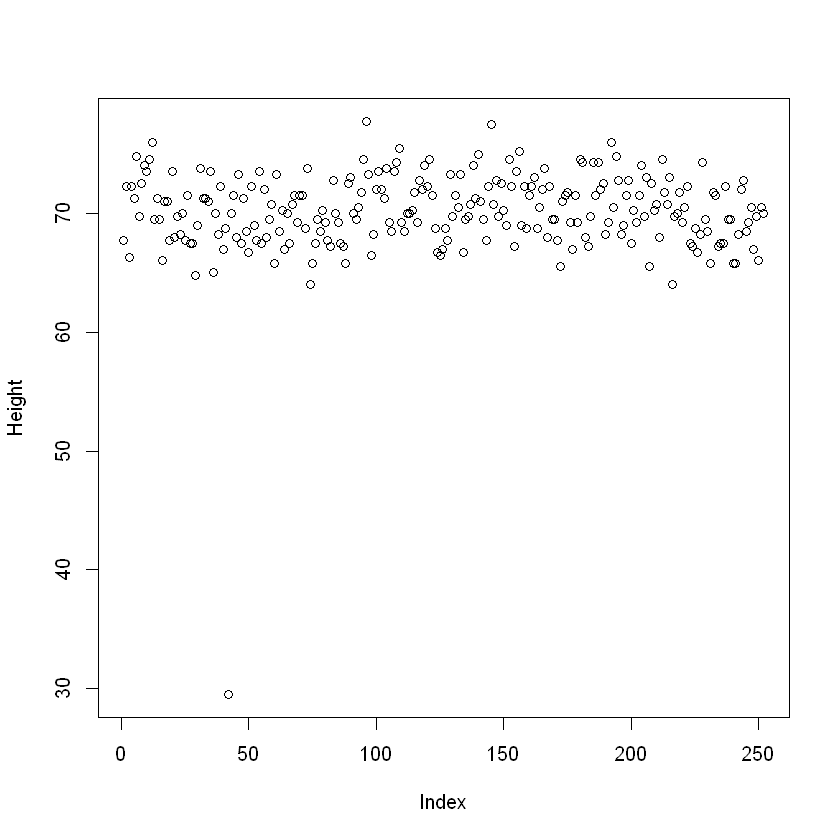

In [5]:
plot(bodyfat[,'HEIGHT'],ylab = 'Height')

In [6]:
d1 = which.min(bodyfat[,'HEIGHT'])

In [7]:
bodyfat[which.min(bodyfat[,'HEIGHT']),'HEIGHT']

[1] 29.5

In [8]:
#bodyfat <- bodyfat[-42,]

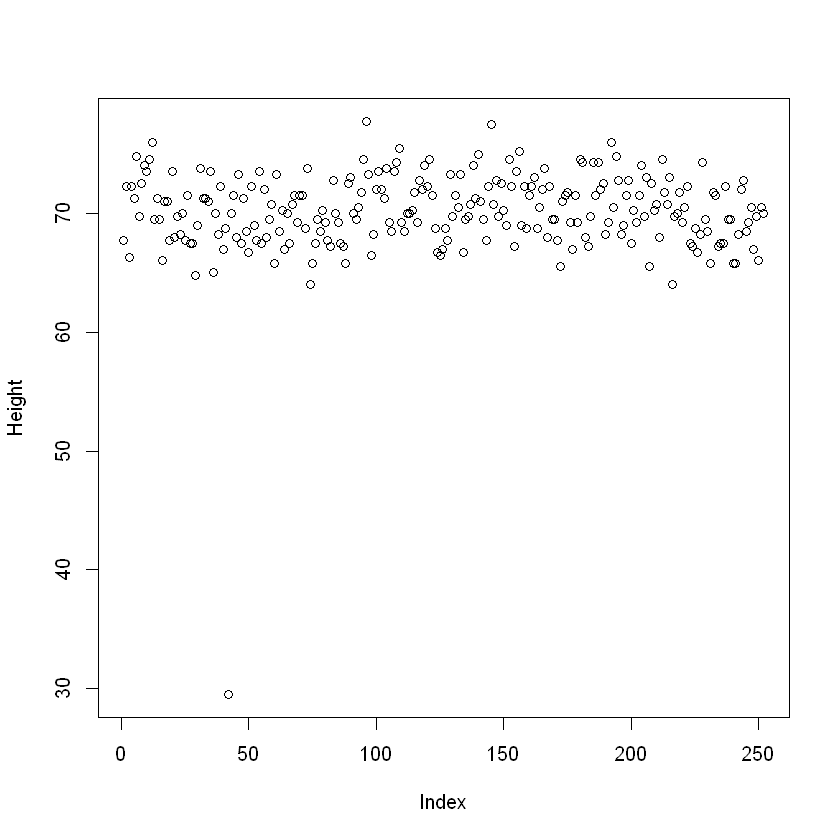

In [9]:
plot(bodyfat[,'HEIGHT'],ylab = 'Height')

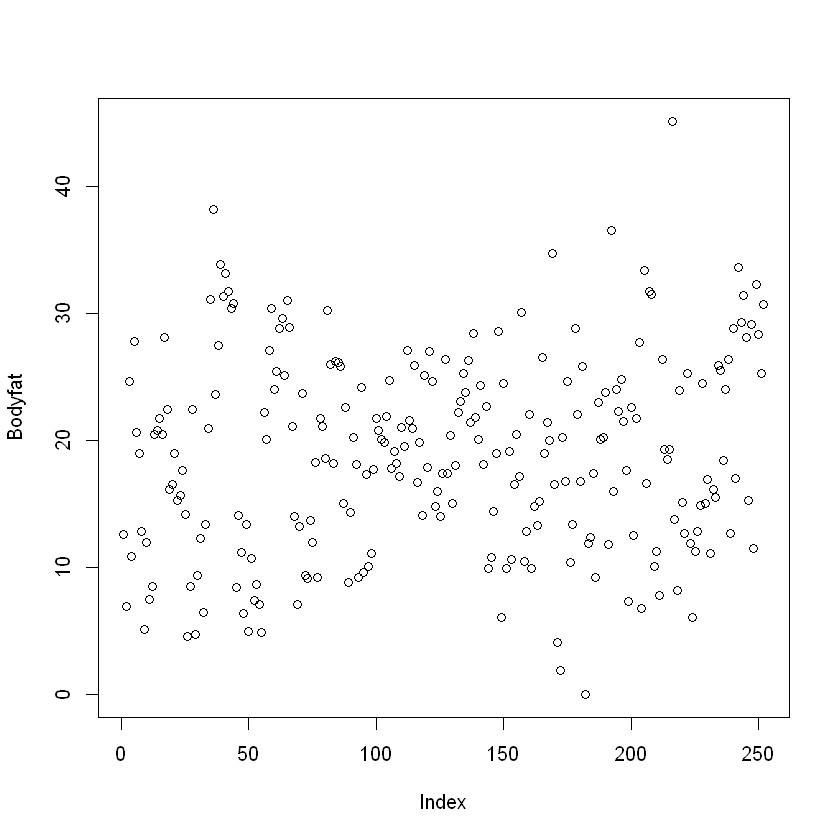

In [10]:
plot(bodyfat[,'BODYFAT'],ylab = 'Bodyfat')

In [11]:
d2 = which(bodyfat$BODYFAT==sort(bodyfat$BODYFAT,partial=1)[1])

In [12]:
bodyfat[d2,'BODYFAT']

[1] 0

In [13]:
d3 = which(bodyfat$BODYFAT==sort(bodyfat$BODYFAT,partial=nrow(bodyfat))[nrow(bodyfat)])

In [14]:
bodyfat[d3,'BODYFAT']

[1] 45.1

In [15]:
d4 = which(bodyfat$BODYFAT==sort(bodyfat$BODYFAT,partial=2)[2])

In [16]:
bodyfat[d4,'BODYFAT']

[1] 1.9

In [18]:
eyeballing_cleanup = c(d1,d2,d3,d4)
bodyfat_1 = bodyfat[-eyeballing_cleanup,]

In [19]:
summary(model_1 <- lm(BODYFAT ~ ., data=bodyfat_1))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.265  -2.677  -0.132   2.844   9.408 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -22.97841   38.06962  -0.604  0.54670    
AGE           0.05546    0.03006   1.845  0.06635 .  
WEIGHT       -0.10236    0.10501  -0.975  0.33065    
HEIGHT        0.07439    0.53680   0.139  0.88991    
ADIPOSITY     0.20456    0.78509   0.261  0.79467    
NECK         -0.43032    0.21740  -1.979  0.04895 *  
CHEST        -0.02803    0.09966  -0.281  0.77876    
ABDOMEN       0.86303    0.08532  10.116  < 2e-16 ***
HIP          -0.21322    0.13752  -1.551  0.12238    
THIGH         0.22637    0.13722   1.650  0.10035    
KNEE          0.04639    0.23110   0.201  0.84108    
ANKLE         0.13970    0.20743   0.673  0.50130    
BICEPS        0.13465    0.16012   0.841  0.40123    
FOREARM       0.41032    0.18550   2.212  0.02794 *  
WRIST        -1.46192    0.493

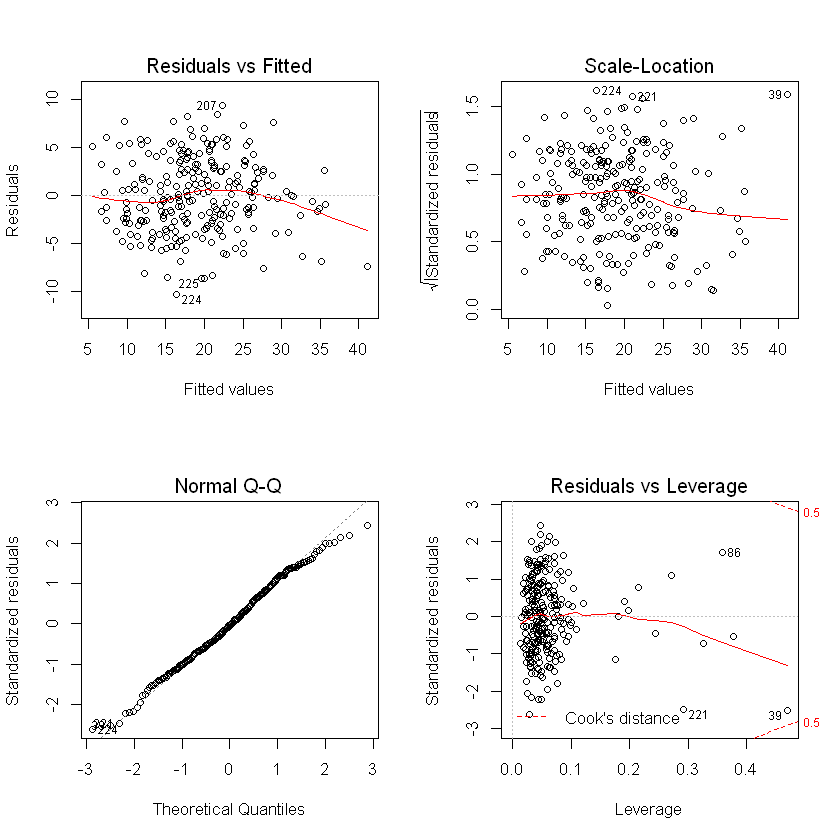

In [20]:
layout(matrix(1:4, ncol=2))
plot(model_1)

In [21]:
# Plot the Cook's Distance using the traditional 4/(n-p) criterion
cooksd <- cooks.distance(model)
sample_size <- nrow(bodyfat_1)
para_size <- ncol(bodyfat_1)-1
plot(cooksd, pch="*", cex=2, main="Influential Obs by Cook\'s distance", ylab = 'Cook\'s Distance')  # plot cook's distance
abline(h = 4/(sample_size-para_size), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4/(sample_size-para_size), names(cooksd),""), col="red")  # add labels

ERROR: Error in cooks.distance(model): object 'model' not found


In [22]:
#influential <- as.numeric(names(cooksd)[(cooksd > (4/(sample_size-para_size)))])
influential <- c(39,85,217)
bodyfat_2 <- bodyfat_1[-influential,]
summary(model_2 <- lm(BODYFAT ~ ., data=bodyfat_2))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6145 -2.7682 -0.1341  2.6990  8.9761 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -52.98425   45.50500  -1.164  0.24548    
AGE           0.05300    0.03014   1.759  0.07997 .  
WEIGHT       -0.17623    0.12738  -1.383  0.16787    
HEIGHT        0.54474    0.61859   0.881  0.37945    
ADIPOSITY     1.01247    0.87017   1.164  0.24582    
NECK         -0.31973    0.21555  -1.483  0.13935    
CHEST        -0.09945    0.10371  -0.959  0.33859    
ABDOMEN       0.83770    0.08560   9.786  < 2e-16 ***
HIP          -0.17800    0.13577  -1.311  0.19117    
THIGH         0.20692    0.13789   1.501  0.13483    
KNEE          0.03515    0.22914   0.153  0.87821    
ANKLE        -0.04642    0.24864  -0.187  0.85205    
BICEPS        0.11607    0.15746   0.737  0.46180    
FOREARM       0.28857    0.19136   1.508  0.13292    
WRIST        -1.37550    0.498

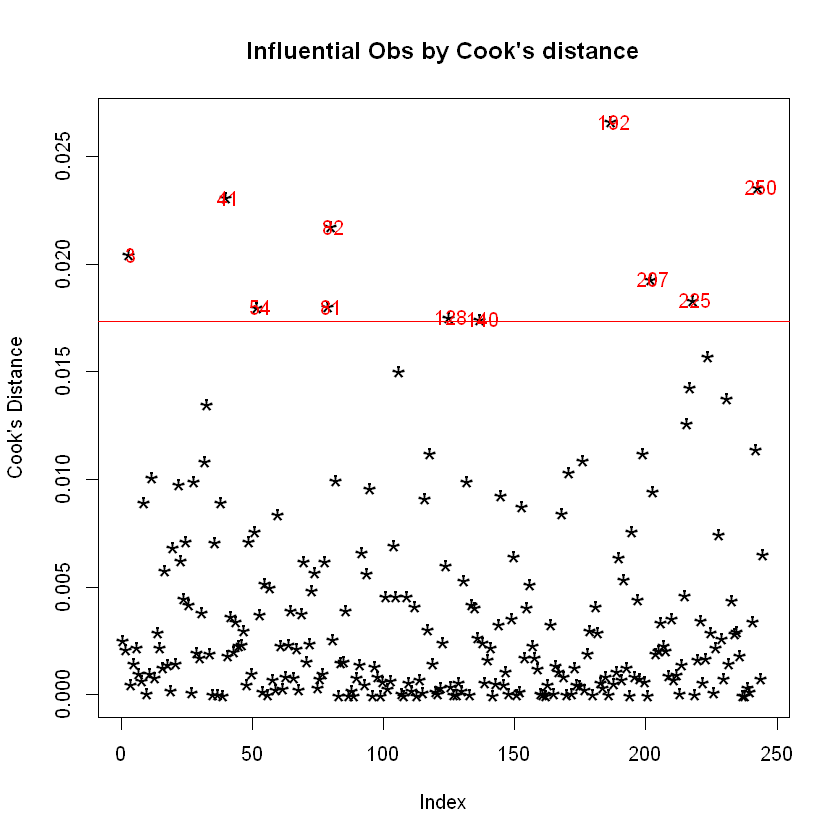

In [70]:
cooksd <- cooks.distance(model_2)
sample_size <- nrow(bodyfat_2)
para_size <- ncol(bodyfat_2)-1
plot(cooksd, pch="*", cex=2, main="Influential Obs by Cook\'s distance", ylab = 'Cook\'s Distance')  # plot cook's distance
abline(h = 4/(sample_size-para_size), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4/(sample_size-para_size), names(cooksd),""), col="red")  # add labels

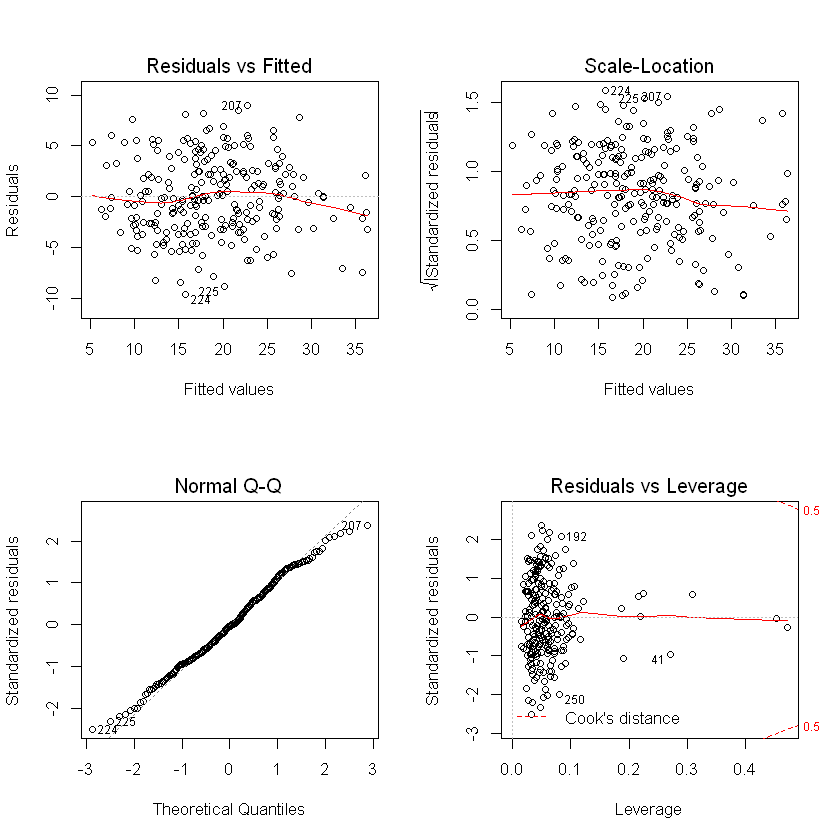

In [23]:
layout(matrix(1:4, ncol=2))
plot(model_2)

In [ ]:
install.packages('car')

also installing the dependencies 'rematch', 'forcats', 'hms', 'readr', 'cellranger', 'progress', 'zip', 'SparseM', 'MatrixModels', 'sp', 'haven', 'data.table', 'readxl', 'openxlsx', 'minqa', 'nloptr', 'RcppEigen', 'carData', 'abind', 'pbkrtest', 'quantreg', 'maptools', 'rio', 'lme4'




In [ ]:
library(car)
outierTest(model_2)

In [28]:
# Variable Selecation

In [29]:
# Eyeballing Varibales

In [30]:
summary(model_2)


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3660  -2.8417  -0.2088   2.5938   8.9283 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48496   38.04522   0.013  0.98984    
AGE          0.06393    0.02990   2.138  0.03355 *  
WEIGHT      -0.03334    0.10580  -0.315  0.75295    
HEIGHT      -0.14173    0.52834  -0.268  0.78875    
ADIPOSITY    0.19187    0.76605   0.250  0.80245    
NECK        -0.35841    0.21449  -1.671  0.09609 .  
CHEST       -0.09740    0.10372  -0.939  0.34872    
ABDOMEN      0.81823    0.08504   9.622  < 2e-16 ***
HIP         -0.19353    0.13603  -1.423  0.15619    
THIGH        0.15381    0.13644   1.127  0.26083    
KNEE        -0.07292    0.22747  -0.321  0.74881    
ANKLE        0.12926    0.20237   0.639  0.52362    
BICEPS       0.16983    0.15651   1.085  0.27900    
FOREARM      0.27245    0.19060   1.429  0.15424    
WRIST       -1.57901    0.48799  -3

In [31]:
# Weight, Height, Adiposity and Knee all has a large p-value.

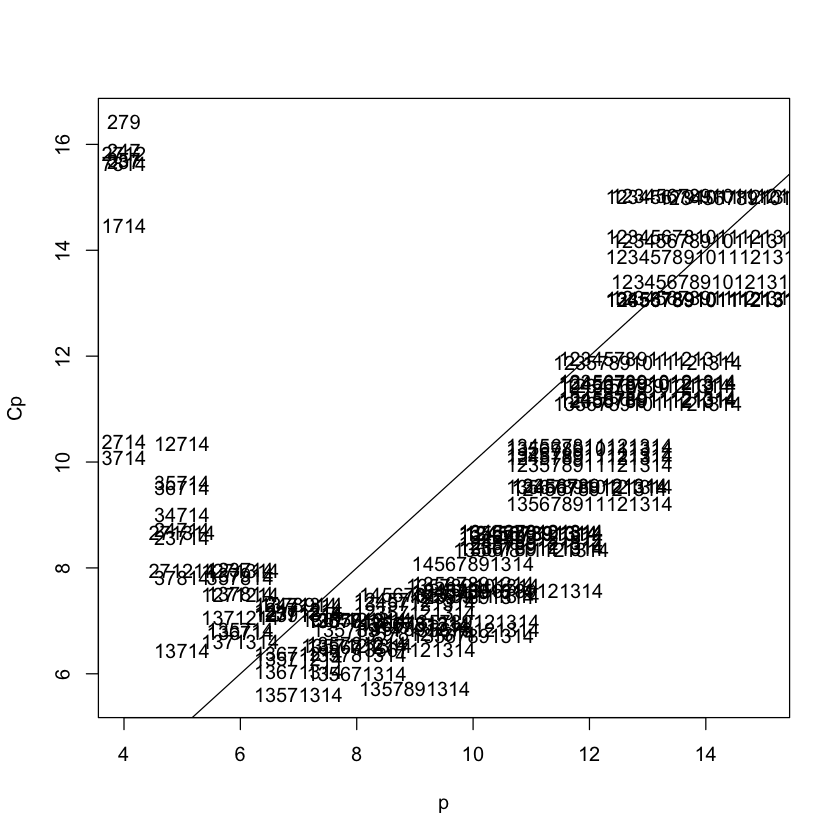

In [32]:
# Mallow’s Cp
X <- model.matrix(model_2)[,-1]
Y <- bodyfat_2[,1]

library(leaps)
library(faraway)

g <- leaps(X,Y)
Cpplot(g)

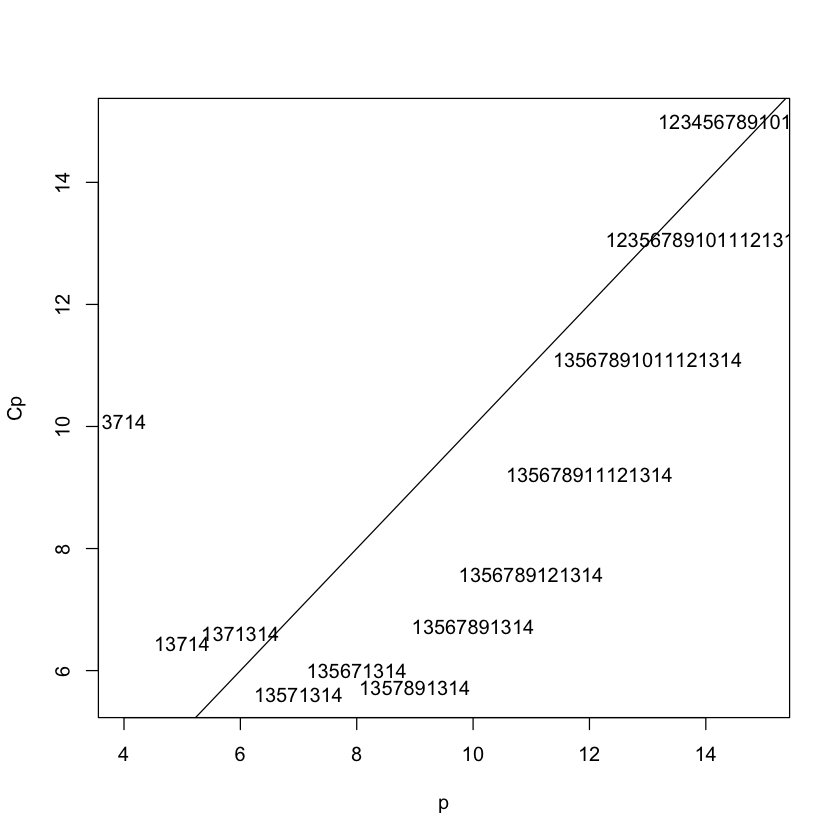

In [33]:
g <- leaps(X,Y, nbest=1)
Cpplot(g)

In [34]:
# (1,3,7,13,14) seems to be a good choice.
cp.choice <- c(1,3,7,13,14)+1 # column 1 responds to bodyfat.
bodyfat_cp <- bodyfat_2[,c(1,cp.choice)]
head(bodyfat_cp)

BODYFAT,AGE,HEIGHT,ABDOMEN,FOREARM,WRIST
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
12.6,23,67.75,85.2,27.4,17.1
6.9,22,72.25,83.0,28.9,18.2
24.6,22,66.25,87.9,25.2,16.6
10.9,26,72.25,86.4,29.4,18.2
27.8,24,71.25,100.0,27.7,17.7
20.6,24,74.75,94.4,30.6,18.8


In [35]:
summary(model_cp <- lm(BODYFAT ~ ., data=bodyfat_cp))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_cp)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0150  -2.9134  -0.1895   2.7326   8.4010 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.04682    7.63012   0.924  0.35666    
AGE          0.06156    0.02303   2.673  0.00804 ** 
HEIGHT      -0.36112    0.11378  -3.174  0.00170 ** 
ABDOMEN      0.68138    0.03324  20.499  < 2e-16 ***
FOREARM      0.22534    0.16691   1.350  0.17828    
WRIST       -1.91114    0.41071  -4.653 5.44e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.867 on 237 degrees of freedom
Multiple R-squared:  0.7314,	Adjusted R-squared:  0.7258 
F-statistic: 129.1 on 5 and 237 DF,  p-value: < 2.2e-16


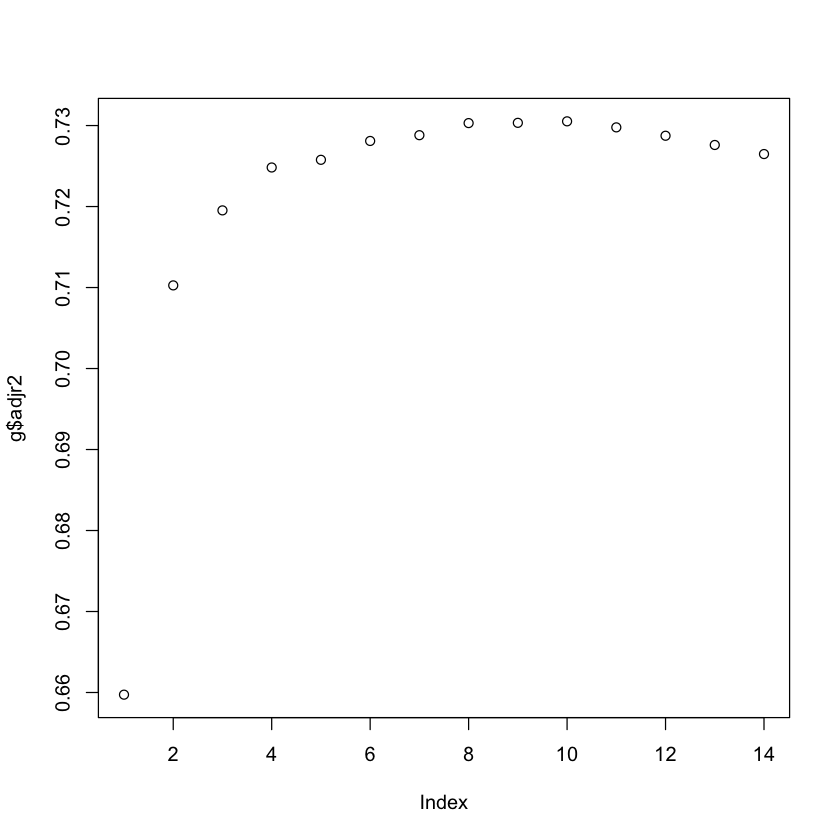

In [36]:
# Adjusted R^2
g <- leaps(X,Y, nbest=1, method="adjr2")
plot(g$adjr2)

In [37]:
(g$which)[which(g$adjr2 == max(g$adjr2)),]

1     2     3     4     5     6     7     8     9     A     B     C     D 
 TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE 
    E 
 TRUE

In [38]:
r2.choice <- which((g$which)[which(g$adjr2 == max(g$adjr2)),]==T)+1 # column 1 responds to bodyfat.
bodyfat_r2 <- bodyfat_2[,c(1,r2.choice)]
head(bodyfat_r2)

BODYFAT,AGE,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,BICEPS,FOREARM,WRIST
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12.6,23,67.75,36.2,93.1,85.2,94.5,59.0,32.0,27.4,17.1
6.9,22,72.25,38.5,93.6,83.0,98.7,58.7,30.5,28.9,18.2
24.6,22,66.25,34.0,95.8,87.9,99.2,59.6,28.8,25.2,16.6
10.9,26,72.25,37.4,101.8,86.4,101.2,60.1,32.4,29.4,18.2
27.8,24,71.25,34.4,97.3,100.0,101.9,63.2,32.2,27.7,17.7
20.6,24,74.75,39.0,104.5,94.4,107.8,66.0,35.7,30.6,18.8


In [39]:
summary(model_r2 <- lm(BODYFAT ~ ., data=bodyfat_r2))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_r2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2186  -2.8085  -0.2169   2.6478   8.8883 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.44973    8.01007   1.554 0.121486    
AGE          0.06113    0.02847   2.147 0.032840 *  
HEIGHT      -0.29544    0.11840  -2.495 0.013282 *  
NECK        -0.37678    0.20498  -1.838 0.067313 .  
CHEST       -0.09853    0.08247  -1.195 0.233417    
ABDOMEN      0.81264    0.07782  10.443  < 2e-16 ***
HIP         -0.20164    0.11982  -1.683 0.093757 .  
THIGH        0.14258    0.12633   1.129 0.260203    
BICEPS       0.16446    0.15268   1.077 0.282530    
FOREARM      0.27263    0.18541   1.470 0.142804    
WRIST       -1.52252    0.45186  -3.369 0.000882 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.833 on 232 degrees of freedom
Multiple R-squared:  0.7417,	Adjusted R-squared:  0.7305 
F-statisti

In [40]:
# AIC and BIC
library(MASS)
model_AIC_back <- stepAIC(model_2, direction="backward", k = 2)
summary(model_AIC_back)

Start:  AIC=671.18
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- ADIPOSITY  1      0.94 3401.4 669.25
- HEIGHT     1      1.07 3401.5 669.26
- WEIGHT     1      1.48 3401.9 669.29
- KNEE       1      1.53 3402.0 669.29
- ANKLE      1      6.09 3406.5 669.61
- CHEST      1     13.15 3413.6 670.12
- BICEPS     1     17.56 3418.0 670.43
- THIGH      1     18.95 3419.4 670.53
<none>                   3400.4 671.18
- HIP        1     30.19 3430.6 671.33
- FOREARM    1     30.48 3430.9 671.35
- NECK       1     41.65 3442.1 672.14
- AGE        1     68.20 3468.6 674.00
- WRIST      1    156.15 3556.6 680.09
- ABDOMEN    1   1380.77 4781.2 751.99

Step:  AIC=669.25
BODYFAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + 
    THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST

          Df Sum of Sq    RSS    AIC
- WEIGHT   1      0.55 3401.9 667.29
- KNEE   


Call:
lm(formula = BODYFAT ~ AGE + HEIGHT + NECK + ABDOMEN + HIP + 
    THIGH + FOREARM + WRIST, data = bodyfat_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2524  -2.8231  -0.1836   2.7729   9.1861 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.15993    7.85537   1.293 0.197157    
AGE          0.06365    0.02842   2.240 0.026053 *  
HEIGHT      -0.28641    0.11821  -2.423 0.016158 *  
NECK        -0.39870    0.19824  -2.011 0.045456 *  
ABDOMEN      0.75987    0.06339  11.988  < 2e-16 ***
HIP         -0.21695    0.11897  -1.824 0.069485 .  
THIGH        0.19628    0.12020   1.633 0.103822    
FOREARM      0.30913    0.17432   1.773 0.077465 .  
WRIST       -1.52677    0.44929  -3.398 0.000797 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.835 on 234 degrees of freedom
Multiple R-squared:  0.7392,	Adjusted R-squared:  0.7303 
F-statistic: 82.91 on 8 and 234 DF,  p-value: < 2.2e

In [41]:
model_BIC_back <- stepAIC(model_2, direction="backward", k = log(nrow(bodyfat_2)))
summary(model_BIC_back)

Start:  AIC=723.58
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- ADIPOSITY  1      0.94 3401.4 718.15
- HEIGHT     1      1.07 3401.5 718.16
- WEIGHT     1      1.48 3401.9 718.19
- KNEE       1      1.53 3402.0 718.19
- ANKLE      1      6.09 3406.5 718.52
- CHEST      1     13.15 3413.6 719.02
- BICEPS     1     17.56 3418.0 719.33
- THIGH      1     18.95 3419.4 719.43
- HIP        1     30.19 3430.6 720.23
- FOREARM    1     30.48 3430.9 720.25
- NECK       1     41.65 3442.1 721.04
- AGE        1     68.20 3468.6 722.91
<none>                   3400.4 723.58
- WRIST      1    156.15 3556.6 728.99
- ABDOMEN    1   1380.77 4781.2 800.89

Step:  AIC=718.15
BODYFAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + 
    THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST

          Df Sum of Sq    RSS    AIC
- WEIGHT   1      0.55 3401.9 712.70
- KNEE   


Call:
lm(formula = BODYFAT ~ AGE + HEIGHT + ABDOMEN + WRIST, data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9193 -2.9444 -0.2702  2.7950  8.4044 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.39501    7.57755   1.108   0.2690    
AGE          0.05189    0.02193   2.366   0.0188 *  
HEIGHT      -0.35987    0.11397  -3.158   0.0018 ** 
ABDOMEN      0.69573    0.03155  22.052  < 2e-16 ***
WRIST       -1.68438    0.37544  -4.486 1.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.874 on 238 degrees of freedom
Multiple R-squared:  0.7294,	Adjusted R-squared:  0.7248 
F-statistic: 160.4 on 4 and 238 DF,  p-value: < 2.2e-16


In [42]:
model_AIC_for <- stepAIC(model_2, direction="forward", k = 2)
summary(model_AIC_for)

Start:  AIC=671.18
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST




Call:
lm(formula = BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST, data = bodyfat_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3660  -2.8417  -0.2088   2.5938   8.9283 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48496   38.04522   0.013  0.98984    
AGE          0.06393    0.02990   2.138  0.03355 *  
WEIGHT      -0.03334    0.10580  -0.315  0.75295    
HEIGHT      -0.14173    0.52834  -0.268  0.78875    
ADIPOSITY    0.19187    0.76605   0.250  0.80245    
NECK        -0.35841    0.21449  -1.671  0.09609 .  
CHEST       -0.09740    0.10372  -0.939  0.34872    
ABDOMEN      0.81823    0.08504   9.622  < 2e-16 ***
HIP         -0.19353    0.13603  -1.423  0.15619    
THIGH        0.15381    0.13644   1.127  0.26083    
KNEE        -0.07292    0.22747  -0.321  0.74881    
ANKLE        0.12926    0.20237   0.639  0.52362    
BICEPS       0.169

In [43]:
model_BIC_for <- stepAIC(model_2, direction="forward", k = log(nrow(bodyfat_2)))
summary(model_BIC_for)

Start:  AIC=723.58
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST




Call:
lm(formula = BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + 
    CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST, data = bodyfat_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3660  -2.8417  -0.2088   2.5938   8.9283 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48496   38.04522   0.013  0.98984    
AGE          0.06393    0.02990   2.138  0.03355 *  
WEIGHT      -0.03334    0.10580  -0.315  0.75295    
HEIGHT      -0.14173    0.52834  -0.268  0.78875    
ADIPOSITY    0.19187    0.76605   0.250  0.80245    
NECK        -0.35841    0.21449  -1.671  0.09609 .  
CHEST       -0.09740    0.10372  -0.939  0.34872    
ABDOMEN      0.81823    0.08504   9.622  < 2e-16 ***
HIP         -0.19353    0.13603  -1.423  0.15619    
THIGH        0.15381    0.13644   1.127  0.26083    
KNEE        -0.07292    0.22747  -0.321  0.74881    
ANKLE        0.12926    0.20237   0.639  0.52362    
BICEPS       0.169

In [44]:
model_AIC_step <- stepAIC(model_2, direction="both", k = 2)
summary(model_AIC_step)

Start:  AIC=671.18
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- ADIPOSITY  1      0.94 3401.4 669.25
- HEIGHT     1      1.07 3401.5 669.26
- WEIGHT     1      1.48 3401.9 669.29
- KNEE       1      1.53 3402.0 669.29
- ANKLE      1      6.09 3406.5 669.61
- CHEST      1     13.15 3413.6 670.12
- BICEPS     1     17.56 3418.0 670.43
- THIGH      1     18.95 3419.4 670.53
<none>                   3400.4 671.18
- HIP        1     30.19 3430.6 671.33
- FOREARM    1     30.48 3430.9 671.35
- NECK       1     41.65 3442.1 672.14
- AGE        1     68.20 3468.6 674.00
- WRIST      1    156.15 3556.6 680.09
- ABDOMEN    1   1380.77 4781.2 751.99

Step:  AIC=669.25
BODYFAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + 
    THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- WEIGHT     1      0.55 3401.9 667.29
- KNE


Call:
lm(formula = BODYFAT ~ AGE + HEIGHT + NECK + ABDOMEN + HIP + 
    THIGH + FOREARM + WRIST, data = bodyfat_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2524  -2.8231  -0.1836   2.7729   9.1861 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.15993    7.85537   1.293 0.197157    
AGE          0.06365    0.02842   2.240 0.026053 *  
HEIGHT      -0.28641    0.11821  -2.423 0.016158 *  
NECK        -0.39870    0.19824  -2.011 0.045456 *  
ABDOMEN      0.75987    0.06339  11.988  < 2e-16 ***
HIP         -0.21695    0.11897  -1.824 0.069485 .  
THIGH        0.19628    0.12020   1.633 0.103822    
FOREARM      0.30913    0.17432   1.773 0.077465 .  
WRIST       -1.52677    0.44929  -3.398 0.000797 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.835 on 234 degrees of freedom
Multiple R-squared:  0.7392,	Adjusted R-squared:  0.7303 
F-statistic: 82.91 on 8 and 234 DF,  p-value: < 2.2e

In [45]:
model_BIC_step <- stepAIC(model_2, direction="both", k = log(nrow(bodyfat_2)))
summary(model_BIC_step)

Start:  AIC=723.58
BODYFAT ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + CHEST + 
    ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + 
    WRIST

            Df Sum of Sq    RSS    AIC
- ADIPOSITY  1      0.94 3401.4 718.15
- HEIGHT     1      1.07 3401.5 718.16
- WEIGHT     1      1.48 3401.9 718.19
- KNEE       1      1.53 3402.0 718.19
- ANKLE      1      6.09 3406.5 718.52
- CHEST      1     13.15 3413.6 719.02
- BICEPS     1     17.56 3418.0 719.33
- THIGH      1     18.95 3419.4 719.43
- HIP        1     30.19 3430.6 720.23
- FOREARM    1     30.48 3430.9 720.25
- NECK       1     41.65 3442.1 721.04
- AGE        1     68.20 3468.6 722.91
<none>                   3400.4 723.58
- WRIST      1    156.15 3556.6 728.99
- ABDOMEN    1   1380.77 4781.2 800.89

Step:  AIC=718.15
BODYFAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + 
    THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST

            Df Sum of Sq    RSS    AIC
- WEIGHT     1      0.55 3401.9 712.70
- KNE


Call:
lm(formula = BODYFAT ~ AGE + HEIGHT + ABDOMEN + WRIST, data = bodyfat_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9193 -2.9444 -0.2702  2.7950  8.4044 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.39501    7.57755   1.108   0.2690    
AGE          0.05189    0.02193   2.366   0.0188 *  
HEIGHT      -0.35987    0.11397  -3.158   0.0018 ** 
ABDOMEN      0.69573    0.03155  22.052  < 2e-16 ***
WRIST       -1.68438    0.37544  -4.486 1.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.874 on 238 degrees of freedom
Multiple R-squared:  0.7294,	Adjusted R-squared:  0.7248 
F-statistic: 160.4 on 4 and 238 DF,  p-value: < 2.2e-16
